In [79]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

In [80]:
df_twitter_enhanced = pd.read_csv('twitter-archive-enhanced-2.csv')
df_twitter_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [81]:
df_twitter_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [82]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [83]:
url="https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv"
response = requests.get(url)
with open('image-predictions-3 (1).tsv', 'wb') as file:
    file.write(response.content)
df_image_predictions = pd.read_csv('image-predictions-3 (1).tsv', sep='\t')

In [84]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [85]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [86]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [87]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [88]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df = pd.DataFrame(df_list) 

In [89]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [90]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [91]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [93]:
df_twitter_enhanced.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
805,772114945936949249,NaN,NaN,2016-09-03 16:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's very nervous for the game. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772114945...,10,10,Finn,None,None,None,None
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605...,12,10,None,None,None,None,None
627,794983741416415232,NaN,NaN,2016-11-05 19:24:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rizzy. She smiles a lot...,7.895309e+17,4.196984e+09,2016-10-21 18:16:44 +0000,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None
1668,682638830361513985,NaN,NaN,2015-12-31 19:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have no words. Just a magnificent pup. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682638830...,12,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
1388,700462010979500032,NaN,NaN,2016-02-18 23:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,None,None,None,None
526,808838249661788160,NaN,NaN,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,None,None,None,None
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,11,10,Juno,None,None,None,None
427,821153421864615936,8.211526e+17,1.132119e+08,2017-01-17 00:33:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@imgur for a polar bear tho I'd say 13/10 is a...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


In [94]:
df_twitter_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [95]:
df_twitter_enhanced[df_twitter_enhanced['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [96]:
df_twitter_enhanced[df_twitter_enhanced['name'].apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [97]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [98]:
df_twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [99]:
df_image_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
798,691096613310316544,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,borzoi,0.441269,True,llama,0.278270,False,Arabian_camel,0.063503,False
189,669375718304980992,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,1,Airedale,0.168762,True,Norfolk_terrier,0.107479,True,Lakeland_terrier,0.097846,True
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,2,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,True
343,672264251789176834,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,Chihuahua,0.609860,True,teddy,0.068134,False,Norwich_terrier,0.059227,True
751,688064179421470721,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1,Eskimo_dog,0.240602,True,Norwegian_elkhound,0.180369,True,Siberian_husky,0.090739,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
908,700505138482569216,https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg,1,bath_towel,0.449684,False,Norwegian_elkhound,0.160205,True,Great_Dane,0.048666,True
1346,759197388317847553,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,1,kuvasz,0.511341,True,golden_retriever,0.076899,True,white_wolf,0.063269,False


In [100]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [101]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [102]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [103]:
df_twitter_enhanced_clean = df_twitter_enhanced.copy()
df_image_predictions_clean = df_image_predictions.copy()


In [104]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')

In [105]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

In [106]:
df_twitter_enhanced_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [107]:
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [108]:
df_twitter_enhanced_clean['source'].value_counts()

Twitter for iPhone    2034
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [109]:
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

df_twitter_enhanced_clean.apply(get_prediction_confidence, axis=1)
df_twitter_enhanced_clean['prediction'] = prediction
df_twitter_enhanced_clean['confidence'] = confidence


In [110]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)


In [111]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

In [112]:
melt_coumns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_twitter_enhanced_clean.columns.tolist() if x not in melt_coumns]

# Melt the the columns into values
df_twitter_enhanced_clean = pd.melt(df_twitter_enhanced_clean, id_vars = stay_columns, value_vars = melt_coumns, 
                         var_name = 'stages', value_name = 'life_stage')


In [113]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('stages', 1)

In [114]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8300 entries, 0 to 8299
Data columns (total 17 columns):
tweet_id                      8300 non-null int64
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8300 non-null object
source                        8300 non-null object
text                          8300 non-null object
retweeted_status_id           324 non-null float64
retweeted_status_user_id      324 non-null float64
retweeted_status_timestamp    324 non-null object
expanded_urls                 8300 non-null object
rating_numerator              8300 non-null int64
rating_denominator            8300 non-null int64
name                          8300 non-null object
jpg_url                       8300 non-null object
prediction                    8300 non-null object
confidence                    8300 non-null float64
life_stage                    8300 non-null object
dtypes: float64(5), int64(3), o

In [115]:
df_twitter_enhanced_clean.life_stage.value_counts()

None       7966
pupper      222
doggo        80
puppo        24
floofer       8
Name: life_stage, dtype: int64

In [117]:
male_pronouns = ['He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in df_twitter_enhanced_clean['text']:
    # Male
    if any(map(lambda v:v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

#add a new column for dog gender
df_twitter_enhanced_clean['dog_gender'] = gender

In [118]:
df_twitter_enhanced_clean.dog_gender.value_counts()

NaN       4720
male      2616
female     964
Name: dog_gender, dtype: int64

In [122]:
print("Number of records", len(df_twitter_enhanced_clean))
df_twitter_enhanced_clean.info()
df_twitter_enhanced_clean.sample(10)

Number of records 7976
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7976 entries, 0 to 8299
Data columns (total 15 columns):
tweet_id                 7976 non-null int64
in_reply_to_status_id    92 non-null float64
in_reply_to_user_id      92 non-null float64
timestamp                7976 non-null object
source                   7976 non-null object
text                     7976 non-null object
expanded_urls            7976 non-null object
rating_numerator         7976 non-null int64
rating_denominator       7976 non-null int64
name                     7976 non-null object
jpg_url                  7976 non-null object
prediction               7976 non-null object
confidence               7976 non-null float64
life_stage               7976 non-null object
dog_gender               7976 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 997.0+ KB


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,prediction,confidence,life_stage,dog_gender
2418,821107785811234820,NaN,NaN,2017-01-16 21:32:06 +0000,Twitter for iPhone,Here's a doggo who looks like he's about to gi...,https://twitter.com/dog_rates/status/821107785...,11,10,None,https://pbs.twimg.com/media/C2UpLA-UcAEK_Fz.jpg,Pomeranian,0.856590,None,male
1046,710997087345876993,NaN,NaN,2016-03-19 01:11:29 +0000,Twitter for iPhone,Meet Milo and Amos. They are the best of pals....,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,malamute,0.281260,None,NaN
1430,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,Twitter for iPhone,This is Apollo. He thought you weren't coming ...,https://twitter.com/dog_rates/status/681579835...,8,10,Apollo,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,Rottweiler,0.760671,None,male
8087,670037189829525505,NaN,NaN,2015-11-27 00:31:29 +0000,Twitter for iPhone,Awesome dog here. Not sure where it is tho. Sp...,https://twitter.com/dog_rates/status/670037189...,5,10,None,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,NaN,0.000000,None,NaN
5057,735648611367784448,NaN,NaN,2016-05-26 01:47:51 +0000,Twitter for iPhone,*faints* 12/10 perfection in pupper form https...,https://twitter.com/dog_rates/status/735648611...,12,10,None,https://pbs.twimg.com/media/CjWMezdW0AErwU3.jpg,Pembroke,0.462594,pupper,NaN
1892,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,Twitter for iPhone,This is Sully. He's a Leviticus Galapagos. Ver...,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,NaN,0.000000,None,NaN
7678,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,None,NaN
7824,675149409102012420,NaN,NaN,2015-12-11 03:05:37 +0000,Twitter for iPhone,holy shit 12/10 https://t.co/p6O8X93bTQ,https://twitter.com/dog_rates/status/675149409...,12,10,None,https://pbs.twimg.com/media/CV6czeEWEAEdChp.jpg,chow,0.999876,None,NaN
7118,738184450748633089,NaN,NaN,2016-06-02 01:44:22 +0000,Twitter for iPhone,"For the last time, we only rate dogs. Pls stop...",https://twitter.com/dog_rates/status/738184450...,9,10,None,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,Bedlington_terrier,0.289471,None,NaN
7555,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,Twitter for iPhone,Another magnificent photo. 12/10 https://t.co/...,https://twitter.com/dog_rates/status/687480748...,12,10,None,https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,English_springer,0.472273,None,NaN


In [123]:
df_twitter_enhanced_clean.life_stage.value_counts()

None       7659
pupper      212
doggo        74
puppo        23
floofer       8
Name: life_stage, dtype: int64

In [124]:
text_ratings_to_fix = df_twitter_enhanced_clean[df_twitter_enhanced_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


617     "Yep... just as I suspected. You're not flossi...
827     This is Bookstore and Seaweed. Bookstore is ti...
878     After so many requests, this is Bretagne. She ...
969     Happy 4/20 from the squad! 13/10 for all https...
1003    This is Bluebert. He just saw that both #Final...
1019    Meet Travis and Flurp. Travis is pretty chill ...
1141    This is Socks. That water pup w the super legs...
1231    This may be the greatest video I've ever been ...
1236    Meet Oliviér. He takes killer selfies. Has a d...
1271    When bae says they can't go out but you see th...
1286    This is Eriq. His friend just reminded him of ...
1297    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1407    This is Darrel. He just robbed a 7/11 and is i...
1529    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1563    These two pups just met and have instantly bon...
1625    Meet Rufio. He is unaware of the pink legless ...
1629    Two gorgeous dogs here. Little waddling dog is...
1694    Meet E

In [125]:
for entry in text_ratings_to_fix:
    mask = df_twitter_enhanced_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_twitter_enhanced_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_twitter_enhanced_clean.loc[mask, column_name2] = 10

In [127]:
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['prediction'] == 'NaN', 'prediction'] = None
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0


In [128]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7976 entries, 0 to 8299
Data columns (total 15 columns):
tweet_id                 7976 non-null int64
in_reply_to_status_id    92 non-null float64
in_reply_to_user_id      92 non-null float64
timestamp                7976 non-null object
source                   7976 non-null object
text                     7976 non-null object
expanded_urls            7976 non-null object
rating_numerator         7976 non-null object
rating_denominator       7976 non-null int64
name                     7976 non-null object
jpg_url                  7976 non-null object
prediction               6744 non-null object
confidence               7976 non-null float64
life_stage               7976 non-null object
dog_gender               3448 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 997.0+ KB


In [132]:
df_twitter_enhanced_clean['tweet_id'] = df_twitter_enhanced_clean['tweet_id'].astype(str)


In [133]:
df_twitter_enhanced_clean['dog_gender'] = df_twitter_enhanced_clean['dog_gender'].astype('category')

In [134]:
df_twitter_enhanced_clean['rating_numerator'] = df_twitter_enhanced_clean['rating_numerator'].astype(float)

In [136]:
df_twitter_enhanced_clean.drop(df_twitter_enhanced_clean.columns[df_twitter_enhanced_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
df_twitter_enhanced_clean.to_csv('twitter-archive-enhanced-2.csv', encoding = 'utf-8', index=False)

In [137]:
df_twitter_enhanced_clean = pd.read_csv('twitter-archive-enhanced-2.csv')
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 15 columns):
tweet_id                 7976 non-null int64
in_reply_to_status_id    92 non-null float64
in_reply_to_user_id      92 non-null float64
timestamp                7976 non-null object
source                   7976 non-null object
text                     7976 non-null object
expanded_urls            7976 non-null object
rating_numerator         7976 non-null float64
rating_denominator       7976 non-null int64
name                     7976 non-null object
jpg_url                  7976 non-null object
prediction               6744 non-null object
confidence               7976 non-null float64
life_stage               7976 non-null object
dog_gender               3448 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 934.8+ KB


In [138]:
df_twitter_enhanced_clean
df_twitter_enhanced_clean['tweet_id'] = df_twitter_enhanced_clean['tweet_id'].astype(object)
df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean.timestamp)
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].astype('category')
df_twitter_enhanced_clean['life_stage'] = df_twitter_enhanced_clean['life_stage'].astype('category')
df_twitter_enhanced_clean['dog_gender'] = df_twitter_enhanced_clean['dog_gender'].astype('category')

df_twitter_enhanced_clean.set_index('timestamp', inplace=True)
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7976 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 14 columns):
tweet_id                 7976 non-null object
in_reply_to_status_id    92 non-null float64
in_reply_to_user_id      92 non-null float64
source                   7976 non-null category
text                     7976 non-null object
expanded_urls            7976 non-null object
rating_numerator         7976 non-null float64
rating_denominator       7976 non-null int64
name                     7976 non-null object
jpg_url                  7976 non-null object
prediction               6744 non-null object
confidence               7976 non-null float64
life_stage               7976 non-null category
dog_gender               3448 non-null category
dtypes: category(3), float64(4), int64(1), object(6)
memory usage: 771.5+ KB


(-1.2884420747098386,
 1.2424646410235636,
 -1.2129642814258061,
 1.2098120741125542)

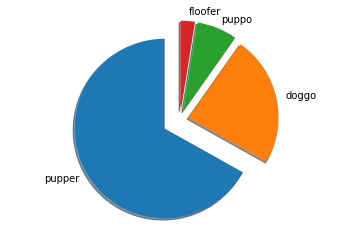

In [146]:
life_stage_count = list(df_twitter_enhanced_clean[df_twitter_enhanced_clean['life_stage'] != 'None']['life_stage'].value_counts())[0:4]
life_stages = df_twitter_enhanced_clean[df_twitter_enhanced_clean['life_stage'] != 'None']['life_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

In [4]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_twitter_enhanced_clean['favorites','retweets'
               ]].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

SyntaxError: invalid syntax (<ipython-input-4-9e3bb9739ba8>, line 3)